# Introduction

Airbnb is a great travel option for many people. And for that reason, it can also be viewed as a lucritive investment option.
The question arises on whether it is possible to determine an Airbnb listings success based on its attributes and performance.
Looking at Airbnb listing in Cape Town through the lens of performance, I'm curious about whether it is worth investing in listings.

I will be exploring the Cape Town Airbnb dataset (source: http://insideairbnb.com/get-the-data) to find out more about the listings available in the area and answering a few questions such as those below to gain a better understanding of this market. 

## Questions:
1. Is it better to invest in a few listings with above-average rates or many lower-priced rated properties?
2. Where are the higher priced listings located vs lower priced?
3. Can we determine the potential revenue of the listings using the database features? 

## Initial Setup - Libraries, Layout and Functions Used

In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import scipy.stats as stats

In [2]:
#layout
palette = ["#761744","#043565","#B2342F","#C85A25","#F3A712","#9C0D38","#50214F","#1C5859","#DE811C","#337B4C"]
sns.set(style='white', context='notebook', palette = palette)

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 500, 'display.max_rows',100)
pd.options.display.float_format = '{:.5f}'.format

%matplotlib inline

## Review the Data

In [3]:
df = pd.read_csv("listings.csv")
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.47600,Entire home/apt,436,3,63,2022-03-23,0.59000,1,331,9,NaN
1,15007,Blaauwberg House,59072,Dirk,NaN,Ward 23,-33.80001,18.46063,Entire home/apt,2769,2,36,2022-02-25,0.36000,5,273,7,NaN
2,15068,Grande Bay,59318,Linda,NaN,Ward 23,-33.78799,18.46082,Entire home/apt,2800,4,0,NaN,NaN,10,365,0,NaN


In [4]:
print("The dataset has {} samples and {} features".format(df.shape[0], df.shape[1]))
print("\n\n")
print("Dataset information")
df.info()

The dataset has 17442 samples and 18 features



Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17442 non-null  int64  
 1   name                            17442 non-null  object 
 2   host_id                         17442 non-null  int64  
 3   host_name                       17440 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   17442 non-null  object 
 6   latitude                        17442 non-null  float64
 7   longitude                       17442 non-null  float64
 8   room_type                       17442 non-null  object 
 9   price                           17442 non-null  int64  
 10  minimum_nights                  17442 non-null  int64  
 11  number_of_reviews       

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,17442.00000,36065305724651064.00000,138755958995037888.00000,3191.00000,16902501.75000,32304229.00000,47068937.00000,591071279796001152.00000
host_id,17442.00000,132093473.02769,129086782.41820,3754.00000,27280292.25000,81741143.50000,218745884.00000,451326096.00000
neighbourhood_group,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,17442.00000,-33.96219,0.10164,-34.26504,-34.02814,-33.93249,-33.91032,-33.55177
longitude,17442.00000,18.48006,0.13127,18.31941,18.40391,18.43498,18.48874,18.94104
price,17442.00000,2548.15497,5889.64466,150.00000,742.00000,1200.00000,2400.00000,182000.00000
minimum_nights,17442.00000,4.28139,14.59406,1.00000,1.00000,2.00000,3.00000,730.00000
number_of_reviews,17442.00000,19.51749,37.63855,0.00000,1.00000,5.00000,21.00000,564.00000
reviews_per_month,13192.00000,0.84429,1.08764,0.01000,0.15000,0.47000,1.10000,19.66000
calculated_host_listings_count,17442.00000,8.12682,16.50855,1.00000,1.00000,2.00000,6.00000,100.00000


Hosts with the most listing - Top 20 

Top 20 Airbnb hosts: 
 host_id
57218252     100
262434513    100
281646889     90
3886732       75
3961453       74
2516345       65
185308070     60
261535066     52
264888170     46
63202371      45
20600730      43
337849463     43
154279041     41
257734440     40
437836003     38
8108425       37
445649321     36
48303994      36
6111977       34
6632489       33
Name: id, dtype: int64 




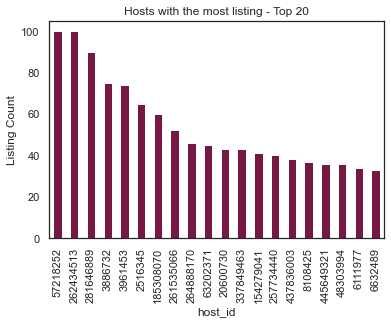

In [6]:
#count the airbnb listing by the hosts
print("Hosts with the most listing - Top 20 \n" )
print("Top 20 Airbnb hosts: \n", df.groupby("host_id")['id'].count().sort_values(ascending = False).head(20),"\n\n")

df.groupby("host_id")['id'].count().sort_values(ascending = False).head(20).plot(kind = 'bar')
plt.title("Hosts with the most listing - Top 20")
plt.ylabel("Listing Count")
plt.show()

### A tale of two investors

I would like to investigate the top 2 Air Bnb listings owners - host 1 and 2, given that they both have 100 listings. It would be interesting to find out what differences exists between the two and which investment strategy I would prefer if I had the choice.

In [7]:
#What type of listing does the top host own
top_host1 = df.host_id == 57218252
top_host2 = df.host_id == 262434513
print("Host #57218252 listings by type: \n",df[top_host1].room_type.value_counts(),"\n\n")
print("Host #262434513 listings by type: \n",df[top_host2].room_type.value_counts())

Host #57218252 listings by type: 
 Entire home/apt    99
Hotel room          1
Name: room_type, dtype: int64 


Host #262434513 listings by type: 
 Private room       98
Entire home/apt     2
Name: room_type, dtype: int64


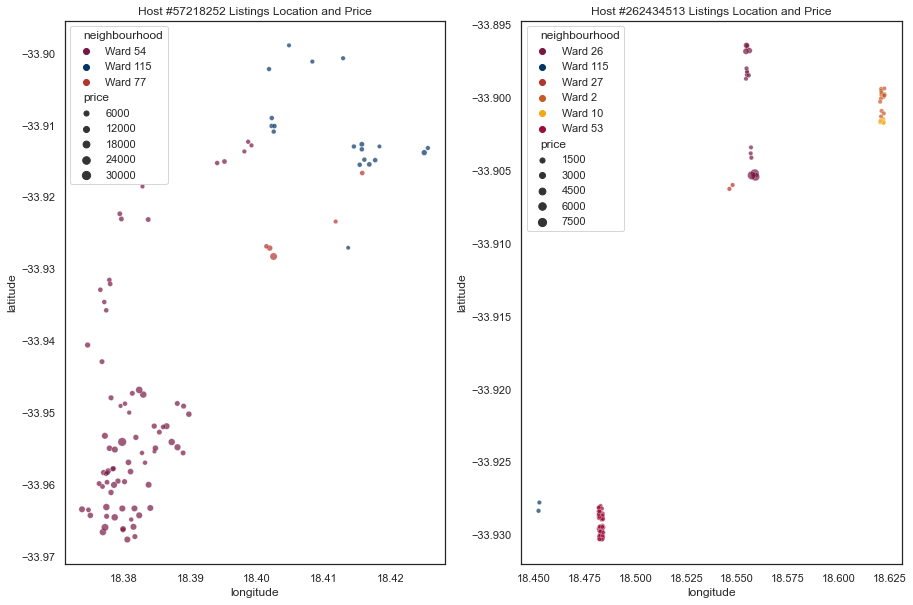

In [8]:
#initiate figure
fig = plt.figure(figsize=(15,10))
#create graph space for 2 scatter plots
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
#create scatter plots for host 1 and host 2 respectively
sns.scatterplot(x = "longitude", y = "latitude", data= df[top_host1], 
                hue= "neighbourhood", alpha= 0.7, size = 'price', ax = ax1)
sns.scatterplot(x = "longitude", y = "latitude", data= df[top_host2], 
                hue= "neighbourhood", alpha= 0.7, size = 'price', ax = ax2)
#set titles for graphs
ax1.set_title("Host #57218252 Listings Location and Price")
ax2.set_title("Host #262434513 Listings Location and Price")

#save and show graphs
plt.savefig("Top Hosts' Listings Location and Price")
plt.show()

The top 2 hosts, both with 100 listings, show varying locations and prices in their listings. The scatter plot on the left shows listings in 3 wards, with rates from R6 000 to R30 000 a night, relatively spaced out but close to the Cape Town coastline (refer to the Tableau deck for map view). Interestingly, the other scatter plot varies quite significantly to the first host's listing. This graph shows listings in more neighbourhoods and concentrated together in tight clusters. In addition, the rates range from R1 500 to R7 500.

The next figure shows the listings for both hosts in the same graph for relative comparison.

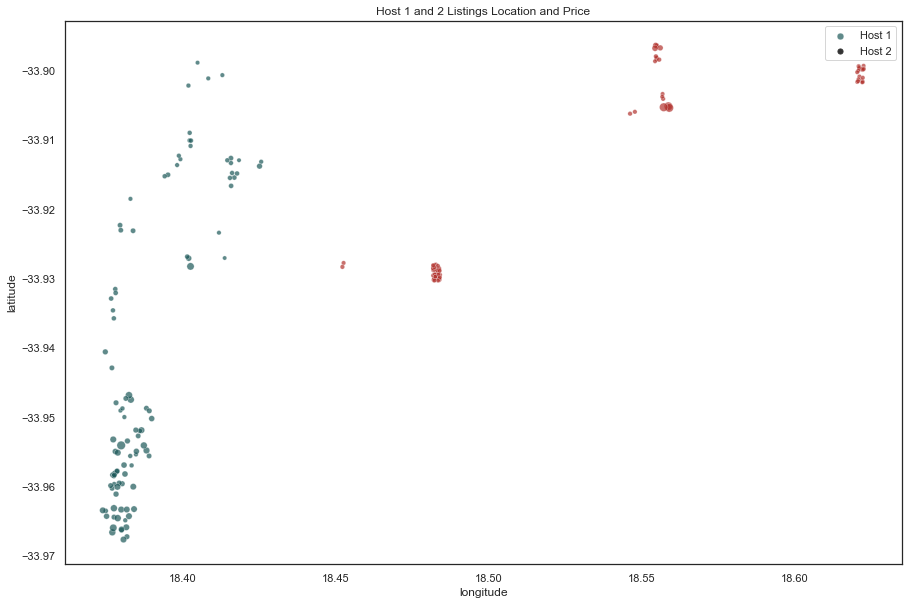

In [9]:
#initiate figure
fig = plt.figure(figsize=(15,10))
#create graph space for 2 scatter plots

#create scatter plots for host 1 and host 2 respectively
sns.scatterplot(x = "longitude", y = "latitude", data= df[top_host1], 
                color = "#1C5859", alpha= 0.7, size = 'price')
sns.scatterplot(x = "longitude", y = "latitude", data= df[top_host2], 
                color = "#B2342F", alpha= 0.7, size = 'price')
#set titles for graphs
plt.title("Host 1 and 2 Listings Location and Price")
plt.legend(['Host 1','Host 2'])

#save and show graphs
plt.savefig("Top Hosts' Listings Location and Price (Combined)")
plt.show()

So these hosts show different investment strategies. One host prefers listings with a higher price and is focused on the coastline areas of Cape Town, while the other looks for listings that are more affordable for tourists, often within the city, away from the coastline. 

Referring to the Tableau Dashboard for more detailed map information: if you are familiar with Cape Town, you will notice that Host 1 (#57218252) owns listings in the higher income areas along the sea board such as Clifton and The Glen, thus warranting the higher than average rates, while Host 2 (#262434513) has listings in central Cape Town in areas like WoodStock and Goodwood, where tourists can enjoy the city life, relatively further from the beach. 

Which do you think is the more profitable investment strategy? Higher priced listings with ocean views or lower priced listings closer to city life?
I would imagine that the higher priced listing are occupied less often to the lower priced listings due to the high price.
Let's investigate the top two hosts in more detail - focusing on the 'price' feature or rates per night

In [10]:
#just out of curiousity - what are the top hosts' names
print("Host 1 name: ",df[top_host1].iloc[0,3])
print("Host 2 name: ",df[top_host2].iloc[0,3])

Host 1 name:  Nox
Host 2 name:  Neo


In [11]:
#price by neightbourhood
print("Host 1 listing rates by Neighbourhood: \n")
df[top_host1].groupby("neighbourhood")['price'].agg({'min','max','mean','count'})

Host 1 listing rates by Neighbourhood: 



,min,count,max,mean
neighbourhood,,,,
Ward 115,1431,19,9500,4104.63158
Ward 54,2729,76,32500,9675.97368
Ward 77,2534,5,21500,9061.40000


In [12]:
#price by neightbourhood
print("Host 2 listing rates by Neighbourhood: \n")
df[top_host2].groupby("neighbourhood")['price'].agg({'min','max','mean','count'})

Host 2 listing rates by Neighbourhood: 



,min,count,max,mean
neighbourhood,,,,
Ward 10,360,5,440,408.00000
Ward 115,550,2,700,625.00000
Ward 2,400,16,680,470.00000
Ward 26,420,18,8241,2191.27778
Ward 27,600,2,700,650.00000
Ward 53,320,57,640,437.89474


In [13]:
#top 20 listings of the top host 1
print("Rates of Top Host 1: \n")
print("The lowest rate per night is R{}".format(df[top_host1].price.min()))
print("The highest rate per night is R{}".format(df[top_host1].price.max()))

print("\n\n Top 20 Highest Rates for Top Host 1: \n", df[top_host1].price.sort_values(ascending = False).head(20))

Rates of Top Host 1: 

The lowest rate per night is R1431
The highest rate per night is R32500


 Top 20 Highest Rates for Top Host 1: 
 10106    32500
8094     21500
7921     21500
5368     19249
6236     18030
2505     17944
7987     17700
2514     17470
4992     17425
2601     16000
13748    15000
7965     15000
2509     14960
11247    14735
3109     14692
4796     14671
8135     14593
8466     14402
10108    14100
14415    14054
Name: price, dtype: int64


In [14]:
#top 20 listings of the top host 2
print("Rates of Top Host 2: \n")
print("The lowest rate per night is R{}".format(df[top_host2].price.min()))
print("The highest rate per night is R{}".format(df[top_host2].price.max()))

print("\n\n Top 20 Highest Rates for Top Host 1: \n", df[top_host2].price.sort_values(ascending = False).head(20))


Rates of Top Host 2: 

The lowest rate per night is R320
The highest rate per night is R8241


 Top 20 Highest Rates for Top Host 1: 
 15335    8241
15336    8241
15337    8241
17284    3200
17283    2400
17282    2400
16425     900
15649     700
15283     700
16429     700
16931     680
16409     660
15647     650
17213     640
17223     600
15646     600
16928     560
16925     560
15277     550
15276     550
Name: price, dtype: int64


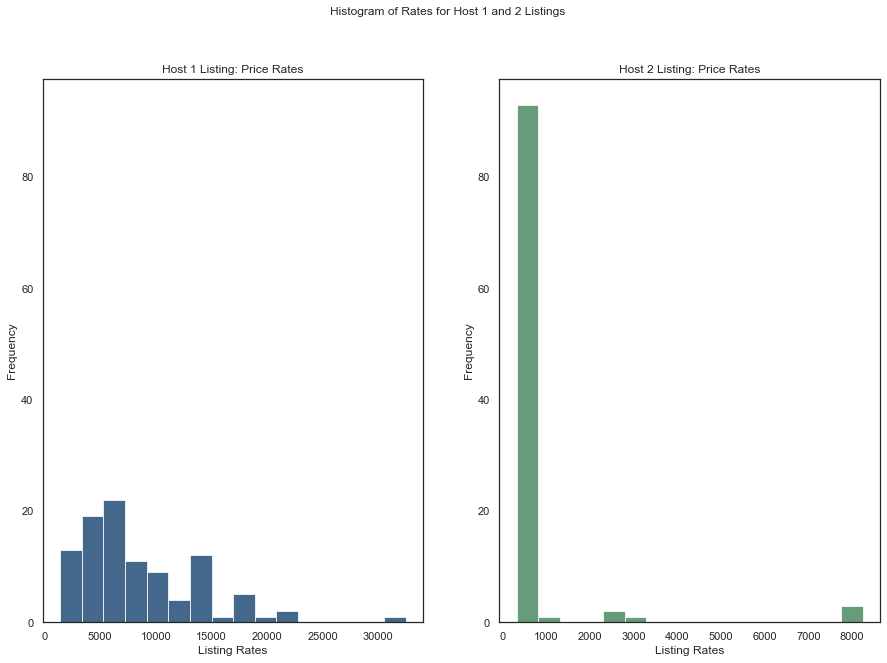

In [15]:
#initiate graph with 2 subplots
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#host 1
df[top_host1].price.plot(kind = 'hist', color = "#043565", alpha = 0.75, ax = ax1, bins = 16)
ax1.set_title("Host 1 Listing: Price Rates")
ax1.set_xlabel("Listing Rates")

#host 2
df[top_host2].price.plot(kind = 'hist', color = "#337B4C", alpha = 0.75, ax = ax2, bins = 16)
ax2.set_title("Host 2 Listing: Price Rates")
ax2.set_xlabel("Listing Rates")

#display settings
ax1.sharey(ax2)
plt.suptitle("Histogram of Rates for Host 1 and 2 Listings")
plt.savefig("Histogram of Rates for Host 1 and 2 Listings")
plt.show()

Host 1 listings are spread between 3 wards or neighborhood groups in Cape Town, with ward 54 showing the highest average price of a listing (R9 675 per night). Host 2's listings are found in 6 wards, with ward 26 showing the highest average price (R 2 191 per night).
From the above histograms, you can see that Host 1's listings (left) are spread out more by price compared to Host 2 (right), where most listings fall under R1 000 per night

## Hypothetical situation - December holiday profits

I want to determine which hosts stands to make more money from their listings in December. Cape Town in December is a tourist hot spot. So it would be interesting to simulate revenue for host 1 and 2 with the following assumptions:

1. More expensive listings will be occupied less often than the relatively cheaper rates. So we will assume that host 1 has a lower occupancy rate than host 2.
2. Assume a probability distribution for occupancy in December for host 1 and 2

      host 1:      poisson distribution with lambda of 14 days, and 30% of the listings are occupied
      
      host 2:      poisson distirbution with a lambda of 22 days, and 65% of the listings are occupied

In [16]:
host1_rates = np.array(df[top_host1].price)
host2_rates = np.array(df[top_host2].price)

In [17]:
#monte carlo simulation - top host 1's potential December profit
booked_host1 = []
for i in range(0, 500): #500 simulations of December bookings
    bookings = []
    for k in np.random.choice([0, 1], size=len(host1_rates), p=[0.7, 0.3]): #30% of host 1 listings chosen at random
        if k == 1:
            for m in host1_rates:
                bookings.append(m * np.random.poisson(lam = 14)) #each listing is given random number of days occupied in poisson dist 
        else:
            bookings.append(0) #non-occupied listings do not generate revenue
    booked_host1.append(np.sum(bookings))

In [18]:
#monte carlo simulation - top host 2's potential December profit
booked_host2 = []
for i in range(0, 500): #500 simulations of December bookings
    bookings = []
    for k in np.random.choice([0, 1], size=len(host1_rates), p=[.35, .65]): #65% of host 1 listings chosen at random
        if k == 1:
            for m in host2_rates:
                bookings.append(m * np.random.poisson(lam = 22)) #each listing is given random number of days occupied in poisson dist
        else:
            bookings.append(0) #non-occupied listings do not generate revenue
    booked_host2.append(np.sum(bookings))

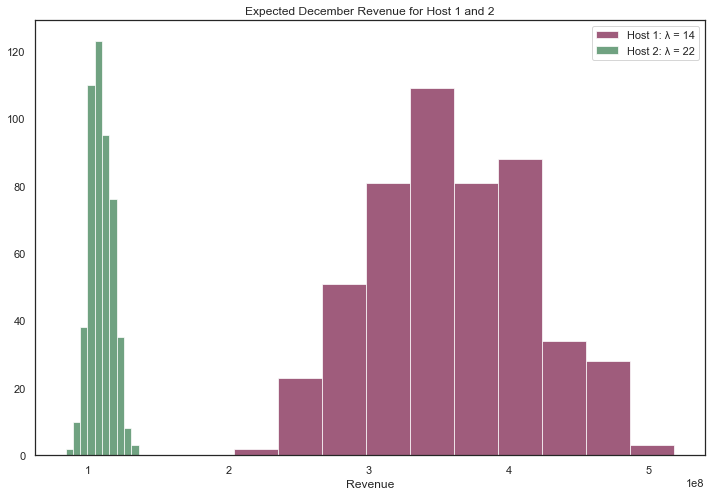

In [19]:
#show total revenue distribution of both hosts in December 
fig = plt.figure(figsize= (12,8))
ax = fig.add_subplot(1,1,1)
plt.hist(booked_host1, color = "#761744", alpha = 0.7, label = 'Host 1: \u03BB = 14')
plt.hist(booked_host2, color = "#337B4C", alpha = 0.7, label = 'Host 2: \u03BB = 22')
plt.legend(loc = 'best')
plt.xlabel("Revenue")
plt.title("Expected December Revenue for Host 1 and 2")
plt.savefig("Expected December Revenue for Host 1 and 2")
plt.show()

In [20]:
print("Summary stats for Host 1: \n")
print("Mean:     {:.2f}".format(np.mean(booked_host1)))
print("Std Dev:  {:.2f}".format(np.std(booked_host1)))
print("Min:      {:.2f}".format(np.min(booked_host1)))
print("Max:      {:.2f}".format(np.max(booked_host1)))

print("Summary stats for Host 2: \n")
print("Mean:     {:.2f}".format(np.mean(booked_host2)))
print("Std Dev:  {:.2f}".format(np.std(booked_host2)))
print("Min:      {:.2f}".format(np.min(booked_host2)))
print("Max:      {:.2f}".format(np.max(booked_host2)))

Summary stats for Host 1: 

Mean:     359752531.87
Std Dev:  56413933.41
Min:      204299278.00
Max:      518360178.00
Summary stats for Host 2: 

Mean:     109012098.16
Std Dev:  8129616.90
Min:      83690188.00
Max:      135873168.00


According to the above experiment, despite having a lower occupancy rate, Host 1 will make substantially more in revenue compared to Host 1.
Host 1 could make a revenue of between R208 million and R489 million from their 100 listings
Host 2 could make a revenue of between R86.5 million and R140 million from their 100 listings

Can Host 2 reach the same level of profit as Host 1? Let's assume a higher amount of listings are occupied with more average days booked.

In [21]:
#monte carlo simulation - top host 1's potential December profit
booked_host1 = []
for i in range(0, 250):
    bookings = []
    for k in np.random.choice([0, 1], size=len(host1_rates), p=[.65, .35]):
        if k == 1:
            for m in host1_rates:
                bookings.append(m * np.random.poisson(lam = 14))
        else:
            bookings.append(0)
    booked_host1.append(np.sum(bookings))
    
#monte carlo simulation - top host 2's potential December profit
booked_host2 = []
for i in range(0, 250):
    bookings = []
    for k in np.random.choice([0, 1], size=len(host1_rates), p=[.2, .8]):
        if k == 1:
            for m in host2_rates:
                bookings.append(m * np.random.poisson(lam = 27))
        else:
            bookings.append(0)
    booked_host2.append(np.sum(bookings))

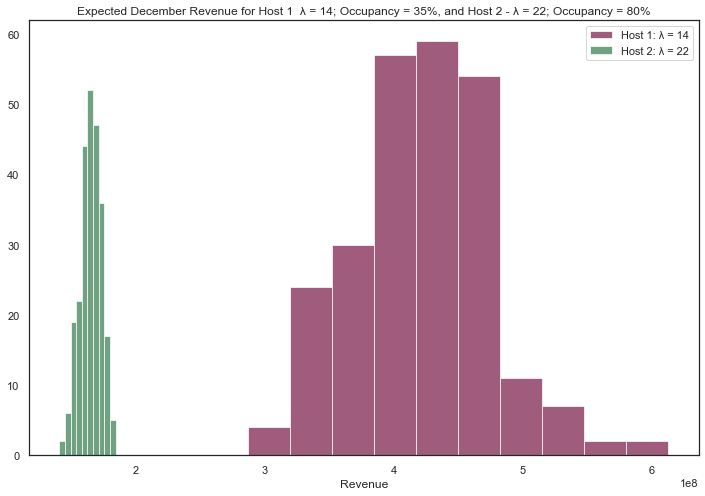

In [22]:
fig = plt.figure(figsize= (12,8))
ax = fig.add_subplot(1,1,1)
plt.hist(booked_host1, color = "#761744", alpha = 0.7, label = 'Host 1: \u03BB = 14')
plt.hist(booked_host2, color = "#337B4C", alpha = 0.7, label = 'Host 2: \u03BB = 22')
plt.legend(loc = 'best')
plt.xlabel("Revenue")
plt.title("Expected December Revenue for Host 1  \u03BB = 14; Occupancy = 35%, and Host 2 - \u03BB = 22; Occupancy = 80%")
plt.savefig("Expected December Revenue for Host 1  \u03BB = 14; Occupancy = 35%, and Host 2 - \u03BB = 22; Occupancy = 80%")
plt.show()

In [23]:
print("Summary stats for Host 1: \n")
print("Mean:     {:.2f}".format(np.mean(booked_host1)))
print("Std Dev:  {:.2f}".format(np.std(booked_host1)))
print("Min:      {:.2f}".format(np.min(booked_host1)))
print("Max:      {:.2f}".format(np.max(booked_host1)))

print("Summary stats for Host 2: \n")
print("Mean:     {:.2f}".format(np.mean(booked_host2)))
print("Std Dev:  {:.2f}".format(np.std(booked_host2)))
print("Min:      {:.2f}".format(np.min(booked_host2)))
print("Max:      {:.2f}".format(np.max(booked_host2)))

Summary stats for Host 1: 

Mean:     421870559.40
Std Dev:  53778817.10
Min:      286924388.00
Max:      612682204.00
Summary stats for Host 2: 

Mean:     164841389.12
Std Dev:  8065604.08
Min:      140681736.00
Max:      184252573.00


Even with a higher occupancy to host 1 (80% for host 2 compared to 30%), host 2's revenue is still significantly lower. 

## Conclusion

Based on the above experiment, it makes more sense to go with the portfolio of host 1 who has more expensive listings.
However, to make a better informed decision, I would like to see real occupancy data of the listings from previous years or months to determine what is realistic for listings with varying prices. In addition, the cost of owning the listings should be taken into consideration to determine the return on investment for both hosts.